# UberEats配達データ分析

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [3]:
FILE_PATH = './../data/trip_master.csv'
master = pd.read_csv(FILE_PATH, index_col='id')

In [4]:
print(len(master))
# master.head(5)

257


In [5]:
master.columns

Index(['date', 'day', 'day_of_week', 'distance', 'drive_time', 'drop_address',
       'drop_latitude', 'drop_longitude', 'drop_time', 'month',
       'pickup_address', 'pickup_latitude', 'pickup_longitude', 'pickup_time',
       'price', 'url', 'year', 'cash', 'peak'],
      dtype='object')

In [6]:
df = master.assign(
    pickup_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.pickup_time.split(':')[0]), minute=int(x.pickup_time.split(':')[1])), axis=1),
    drop_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.drop_time.split(':')[0]), minute=int(x.drop_time.split(':')[1])), axis=1),    
    shop_position_id = master.apply(lambda x: str(x.pickup_latitude) + "-" + str(x.pickup_longitude), axis=1)
                  ) .drop(['date', 'day', 'year', 'url', 'pickup_latitude', 'pickup_time', 'pickup_longitude', 'pickup_address', 
                           'day_of_week', 'pickup_time', 'drop_time', "drop_address", "drop_latitude", "drop_longitude"], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, d92f23b6-46a8-48d7-823c-8cadb9182193 to df2b1a54-c88b-45ef-8e0d-aa9aa6549172
Data columns (total 9 columns):
distance            257 non-null float64
drive_time          257 non-null float64
month               257 non-null int64
price               257 non-null int64
cash                84 non-null float64
peak                84 non-null float64
pickup_datetime     257 non-null datetime64[ns]
drop_datetime       257 non-null datetime64[ns]
shop_position_id    257 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 20.1+ KB


In [8]:
df['date'] = df['pickup_datetime'].dt.date
df['day_of_week_num'] = df['pickup_datetime'].dt.dayofweek
df['day_of_week'] = df['pickup_datetime'].dt.weekday_name
df['month_day_num'] = df['pickup_datetime'].dt.day
df["hour_of_day"] = df['pickup_datetime'].dt.hour
df["week_of_month"] = df['pickup_datetime'].dt.week

In [9]:
# df.head(3)

## 毎日のデータ集計

In [10]:
target_day = datetime.datetime(2020, 1, 21).date()
# target_day = datetime.datetime.today().date()
df_day = df[df["date"] == target_day].sort_values('pickup_datetime')

In [11]:
df_day

,distance,drive_time,month,price,cash,peak,pickup_datetime,drop_datetime,shop_position_id,date,day_of_week_num,day_of_week,month_day_num,hour_of_day,week_of_month
id,,,,,,,,,,,,,,,
b24462dd-d819-4fdd-9aa6-847dc7ef6958,1.90,9.9,1,435,4093.0,0.0,2020-01-21 11:31:00,2020-01-21 11:51:00,35.578468322753906-139.66078186035156,2020-01-21,1,Tuesday,21,11,4
4f9ab9b6-428e-41f6-98e5-529200630185,1.11,9.8,1,392,1223.0,0.0,2020-01-21 11:54:00,2020-01-21 12:10:00,35.5648078918457-139.65446472167972,2020-01-21,1,Tuesday,21,11,4
ea9ba66e-cfcf-4a69-812e-fce4baca54f6,1.53,10.0,1,415,0.0,0.0,2020-01-21 12:16:00,2020-01-21 12:34:00,35.565372467041016-139.65089416503906,2020-01-21,1,Tuesday,21,12,4
c7afcdfc-36d5-415e-8b0e-913cf364e51b,2.57,19.2,1,472,0.0,0.0,2020-01-21 12:39:00,2020-01-21 13:01:00,35.56485366821289-139.65449523925778,2020-01-21,1,Tuesday,21,12,4
df2b1a54-c88b-45ef-8e0d-aa9aa6549172,0.85,11.0,1,379,0.0,0.0,2020-01-21 13:07:00,2020-01-21 13:21:00,35.57721328735352-139.66218566894528,2020-01-21,1,Tuesday,21,13,4
4755d883-650b-4f74-8c59-ff2f98d75f5f,1.17,10.4,1,516,0.0,0.0,2020-01-21 17:38:00,2020-01-21 17:56:00,35.57447814941406-139.65885925292972,2020-01-21,1,Tuesday,21,17,4
df838455-1038-43b5-bc81-ff39eb9c89c9,2.96,27.2,1,602,1197.0,110.0,2020-01-21 17:59:00,2020-01-21 18:28:00,35.5732307434082-139.65718078613278,2020-01-21,1,Tuesday,21,17,4
4b10fd51-d132-4e72-8f8d-fc6aebad59dc,1.80,15.4,1,430,0.0,0.0,2020-01-21 19:04:00,2020-01-21 19:26:00,35.57526397705078-139.65945434570312,2020-01-21,1,Tuesday,21,19,4
9242e424-752d-43eb-968c-7549fd84886f,2.25,14.8,1,584,4406.0,130.0,2020-01-21 19:33:00,2020-01-21 19:57:00,35.57439422607422-139.65861511230472,2020-01-21,1,Tuesday,21,19,4


In [12]:
drive_count = len(df_day)
drive_hours = round(df_day["drive_time"].sum() / 60, 1)
drive_length = round(df_day["distance"].sum() , 2)
total_price = df_day["price"].sum()
long_count = len(df_day[df_day["distance"] >= 2])
cash_count = len(df_day[df_day["cash"] != 0])
peak_count = len(df_day[df_day["peak"] != 0])

In [13]:
print("{}  配達件数: {}件, 配達時間: {}h, 配達距離: {}km, 配達報酬: {}円, ロングドロップ{}件, ピーク{}件, 現金{}件"
      .format(target_day, drive_count, drive_hours, drive_length, total_price, long_count, peak_count, cash_count))

2020-01-21  配達件数: 11件, 配達時間: 2.6h, 配達距離: 18.62km, 配達報酬: 5123円, ロングドロップ3件, ピーク2件, 現金4件


## 日別の集計

In [14]:
groupby = df.groupby('date')

In [15]:
df_by_day = pd.DataFrame()
df_by_day["配達件数"] = groupby["pickup_datetime"].count()
df_by_day["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_day["配達距離(km)"] = groupby["distance"].sum()
df_by_day["配達報酬(円)"] = groupby["price"].sum()
df_by_day["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_day["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_day["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_day["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_day["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [16]:
df_by_day.index.name = '月日'
df_by_day.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
月日,,,,,,,,,
2019-12-11,2,1.1,4.41,902,1,0,0,14.6,4.12
2019-12-12,3,1.2,4.75,1254,1,0,0,14.7,4.08
2019-12-13,7,2.7,14.01,3223,3,0,0,11.5,5.22
2019-12-15,9,3.6,12.91,4559,2,0,0,16.5,3.64
2019-12-16,7,2.1,6.48,3119,0,0,0,19.4,3.10
2019-12-17,3,1.5,5.29,1588,1,0,0,16.8,3.57
2019-12-18,7,3.4,18.90,3570,4,0,0,10.7,5.61
2019-12-19,11,4.0,24.32,5492,6,0,0,9.9,6.04
2019-12-24,11,3.6,15.82,5341,0,0,0,13.6,4.41


## 週別の集計

In [17]:
groupby = df.groupby('week_of_month')

In [18]:
df_by_week = pd.DataFrame()
df_by_week["配達件数"] = groupby["pickup_datetime"].count()
df_by_week["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_week["配達距離(km)"] = groupby["distance"].sum()
df_by_week["配達報酬(円)"] = groupby["price"].sum()
df_by_week["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_week["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_week["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_week["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_week["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [19]:
df_by_week.index.name = '週番号'
df_by_week.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
週番号,,,,,,,,,
1,26,6.5,40.66,12875,7,0,0,9.6,6.23
2,59,15.0,88.88,26269,13,0,0,10.1,5.93
3,58,14.9,99.73,30502,21,16,27,9.0,6.68
4,26,5.9,43.64,11673,8,3,17,8.1,7.37
50,21,8.5,36.08,9938,7,0,0,14.1,4.26
51,28,11.0,54.99,13769,11,0,0,12.0,5.01
52,39,10.6,61.73,19793,7,0,0,10.3,5.84


## 月別の集計

In [20]:
groupby = df.groupby('month')
df_by_month = pd.DataFrame()
df_by_month["配達件数"] = groupby["pickup_datetime"].count()
df_by_month["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_month["配達距離(km)"] = groupby["distance"].sum()
df_by_month["配達報酬(円)"] = groupby["price"].sum()
df_by_month["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_month["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_month["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_month["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_month["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [21]:
df_by_month.index.name = '月'
df_by_month

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
月,,,,,,,,,
1,157,39.3,255.94,76082,47,19,44,9.2,6.51
12,100,33.1,169.77,48737,27,0,0,11.7,5.13


## 全データ分析

Text(0.5, 1.0, '曜日ごとの配達回数')

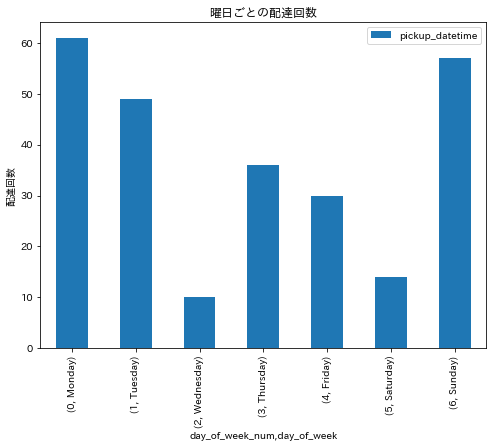

In [22]:
uber_weekdays = df.pivot_table(index=['day_of_week_num','day_of_week'],
                                  values='pickup_datetime',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('曜日ごとの配達回数')

Text(0.5, 1.0, '日にちごとの配達回数')

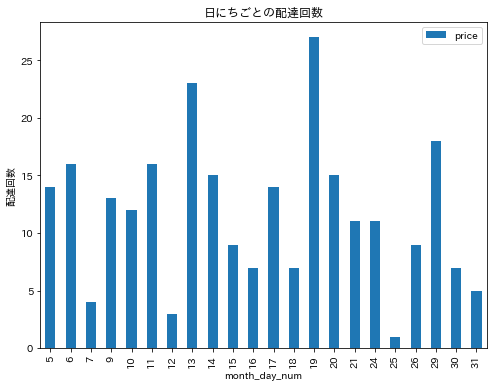

In [23]:
uber_monthdays = df.pivot_table(index=['month_day_num'],
                                  values='price',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('日にちごとの配達回数')

Text(0.5, 1.0, '時間ごとの配達回数')

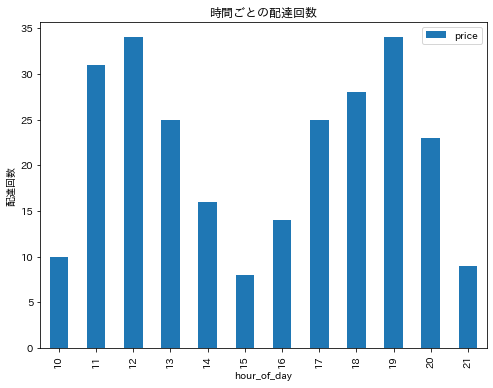

In [24]:
uber_hour = df.pivot_table(index=['hour_of_day'],
                                  values='price',
                                  aggfunc='count')
uber_hour.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('時間ごとの配達回数')

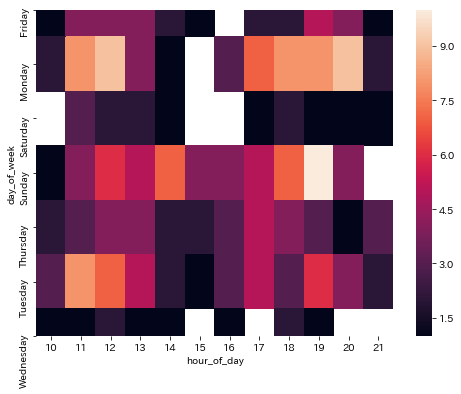

In [25]:
def count_rows(rows):
    return len(rows)

by_cross = df.groupby('day_of_week hour_of_day'.split()).apply(count_rows).unstack()
sns.heatmap(by_cross)